In [1]:
# Cleaning csv

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simplekml

In [2]:
# Convert nmea to csv
os.system("python nmeatocsv.py")

0

In [3]:
# Read original csv
df = pd.read_csv('data/input/processed/2021-02-28_16-50-59.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,$GNGGA,075059.87,3753.0151919,N,13903.4326404,E,2,12,0.65,5.107,M,37.492,M,NaN,0885*40
1,$GNGLL,3753.0151919,N,13903.4326404,E,075059.87,A,D*7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$PRDID,-0.1,-0.0,21.5*7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$PSAT,HPR,075100.00,21.5,-0.1,-0.0,G*2F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,075100.00,A,3753.0151922,N,13903.4326408,E,0.031,176.58,280221,NaN,NaN,D,V*01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43494,$GNVTG,251.03,T,NaN,M,0.007,N,0.013,K,D*26,NaN,NaN,NaN,NaN,NaN
43495,$GNGGA,080606.25,3753.6879018,N,13902.9057067,E,4,12,0.63,2.978,M,37.475,M,NaN,0885*45
43496,$GNGLL,3753.6879018,N,13902.9057067,E,080606.25,A,D*75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43497,$PRDID,-1.7,-1.5,38.6*76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# See unique values of first column
df[0].unique()

array(['$GNGGA', '$GNGLL', '$PRDID', '$PSAT', '$GNRMC', '$GNVTG',
       '$GNTXT'], dtype=object)

In [5]:
# Extract $GNRMC
# Data Description https://gpsd.gitlab.io/gpsd/NMEA.html#_rmc_recommended_minimum_navigation_information
# Data Description http://navspark.mybigcommerce.com/content/NMEA_Format_v0.1.pdf
# RMC – Recommended Minimum Specific GNSS Data 

gnrmc =  df[df[0] == "$GNRMC"]
gnrmc.columns = [
    "Message name",
    "UTC time", # UTC time in hhmmss.sss format (000000.000 ~ 235959.999)
    "Status", # Status: ‘V’ = Navigation receiver warning; ‘A’ = Data Valid
    "Latitude", # Latitude in dddmm.mmmm format. Leading zeros are inserted.
    "N/S indicator", # Longitude
    "Longitude", # Longitude in dddmm.mmmm format. Leading zeros are inserted.
    "E/W Indicator", # ‘E’ = East; ‘W’ = West
    "Speed over ground", # Speed over ground in knots (000.0 ~ 999.9) 
    "Course over ground", # Course over ground in degrees (000.0 ~ 359.9)
    "UTC Date", # UTC date of position fix, ddmmyy format
    "",
    "",
    "Mode indicator", # Mode indicator: ‘N’ = Data not valid; ‘A’ = Autonomous mode; ‘D’ = Differential mode; ‘E’ = Estimated (dead reckoning) mode
    "checksum",
    "Ending of sentence"
    ]
gnrmc

,Message name,UTC time,Status,Latitude,N/S indicator,Longitude,E/W Indicator,Speed over ground,Course over ground,UTC Date,,,Mode indicator,checksum,Ending of sentence
4,$GNRMC,075100.00,A,3753.0151922,N,13903.4326408,E,0.031,176.58,280221,NaN,NaN,D,V*01,NaN
10,$GNRMC,075100.12,A,3753.0151922,N,13903.4326405,E,0.022,176.58,280221,NaN,NaN,D,V*0D,NaN
16,$GNRMC,075100.25,A,3753.0151906,N,13903.4326426,E,0.048,176.58,280221,NaN,NaN,D,V*02,NaN
22,$GNRMC,075100.37,A,3753.0151903,N,13903.4326427,E,0.015,176.58,280221,NaN,NaN,D,V*0D,NaN
28,$GNRMC,075100.50,A,3753.0151903,N,13903.4326436,E,0.016,176.58,280221,NaN,NaN,D,V*0F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43469,$GNRMC,080605.75,A,3753.6879021,N,13902.9057060,E,0.002,251.03,280221,NaN,NaN,R,V*19,NaN
43475,$GNRMC,080605.88,A,3753.6879013,N,13902.9057070,E,0.013,251.03,280221,NaN,NaN,R,V*1B,NaN
43481,$GNRMC,080606.00,A,3753.6879025,N,13902.9057072,E,0.022,251.03,280221,NaN,NaN,R,V*1D,NaN
43487,$GNRMC,080606.13,A,3753.6879014,N,13902.9057066,E,0.012,251.03,280221,NaN,NaN,R,V*1B,NaN


In [6]:
# only Latitude, Longitude, and Speed over ground
indicator = gnrmc[["N/S indicator", "E/W Indicator"]]
gnrmc = gnrmc[["Latitude", "Longitude", "Speed over ground"]].astype(float)

# check digit and sign for lat and long

# lat
# 度
d = (gnrmc["Latitude"] - gnrmc["Latitude"] % 100) / 100
# 分
m = gnrmc["Latitude"] % 100
gnrmc["Latitude"] = d + m / 60
gnrmc["Latitude"] *= indicator["N/S indicator"].apply(lambda x: 1 if x == 'N' else -1)

# long
# 度
d = (gnrmc["Longitude"] - gnrmc["Longitude"] % 100) / 100
# 分
m = gnrmc["Longitude"] % 100
gnrmc["Longitude"] = d + m / 60
gnrmc["Longitude"] *= indicator["E/W Indicator"].apply(lambda x: 1 if x == 'E' else -1)

# 1 knot = 1.852 km/h
gnrmc["Speed over ground"] *= 1.852

gnrmc

,Latitude,Longitude,Speed over ground
4,37.883587,139.057211,0.057412
10,37.883587,139.057211,0.040744
16,37.883587,139.057211,0.088896
22,37.883587,139.057211,0.027780
28,37.883587,139.057211,0.029632
...,...,...,...
43469,37.894798,139.048428,0.003704
43475,37.894798,139.048428,0.024076
43481,37.894798,139.048428,0.040744
43487,37.894798,139.048428,0.022224


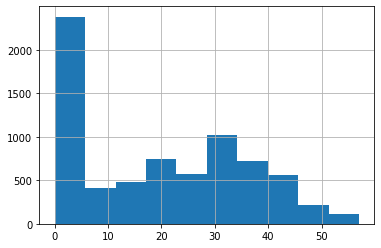

In [7]:
gnrmc["Speed over ground"].hist()
plt.show()

In [8]:
# delete data less than 0.5 km/h
gnrmc = gnrmc[gnrmc["Speed over ground"] > 0.5]

<ipython-input-9-a053ef461b55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnrmc["Min-max scaled speed"] = ( gnrmc["Speed over ground"] - gnrmc["Speed over ground"].min() ) / ( gnrmc["Speed over ground"].max() - gnrmc["Speed over ground"].min() )


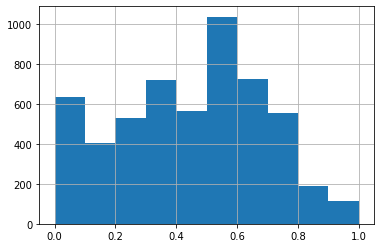

In [9]:
# min-max normalize
gnrmc["Min-max scaled speed"] = ( gnrmc["Speed over ground"] - gnrmc["Speed over ground"].min() ) / ( gnrmc["Speed over ground"].max() - gnrmc["Speed over ground"].min() )
gnrmc["Min-max scaled speed"].hist()
# Standardize
# gnrmc["Standard scaled speed"] = ( gnrmc["Speed over ground"] - gnrmc["Speed over ground"].mean() ) / gnrmc["Speed over ground"].std()
# gnrmc["Standard scaled speed"].hist()

In [10]:
path_coords = gnrmc[["Latitude", "Longitude"]].values
# array to tuple list
path_coords = list(map(tuple, path_coords))
path_coords[0]

(37.88359775166667, 139.05720127166666)

In [13]:
# Use simplekml to create kml
# Standardize the height (Speed)
# https://simplekml.readthedocs.io/en/latest/
# https://simplekml.readthedocs.io/en/latest/geometries.html#simplekml.LineString

kml = simplekml.Kml()
kml.document.name = "Test"

lin = kml.newlinestring(
    name="Pathway", 
    description="A pathway in Toyano.",
    coords=path_coords)

kml.save("data/kml/path.kml")


In [75]:
# print(kml.kml())